This notebook focuses on the usage of color in our visualizations.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
pollution_data = pd.read_csv("assets/pollution-wide.csv")

pollution_data.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [95]:
pollution_data.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


## Continous color palettes

We can generate the color palettes of our choise using one of three functions:

* `sns.color_palette`
* `sns.light_palette`
* `sns.dark_palette`
* `sns.diverging_palette`

We will mainly use `sns.light_palette` and `sns.dark_palette` for continuous palettes.

We can make the color palettes a color maps for continuous variables by setting `as_cmap` to `True`.

If we wrote

```python
color_palette = sns.light_palette("orangered", as_cmap = True)
```

This will generate a **sequential** color map for continuous variables with beginning of white and ending with orangered.

In [22]:
sns.light_palette("orangered", n_colors=10) # these are the colors will be mapped to the data

[(0.9522752793774122, 0.9411692618201146, 0.9403349869034182),
 (0.9575156408575395, 0.8675368353780444, 0.8370825177532389),
 (0.9627560023376668, 0.7939044089359741, 0.7338300486030597),
 (0.9681835195849414, 0.7176422529781157, 0.6268899912689455),
 (0.9734238810650687, 0.6440098265360454, 0.5236375221187662),
 (0.9788513983123435, 0.5677476705781868, 0.41669746478465197),
 (0.9840917597924708, 0.4941152441361166, 0.3134449956344728),
 (0.9895192770397454, 0.41785308817825806, 0.20650493830035854),
 (0.9947596385198727, 0.3442206617361879, 0.10325246915017927),
 (1.0, 0.27058823529411763, 0.0)]

In [16]:
cinci_2014 = pollution_data.query("city == 'Cincinnati' & year == 2014")

<AxesSubplot:xlabel='CO', ylabel='NO2'>

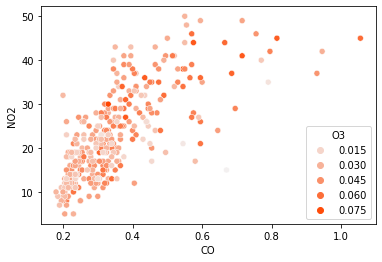

In [17]:
color_palette = sns.light_palette("orangered", as_cmap = True)

sns.scatterplot(
    data = cinci_2014,
    x = "CO",
    y = "NO2",
    hue = "O3",
    palette = color_palette
)

To create a diverging color palette, which is a color palette that starts with a color and gradient to a neutral color 'ususally white' and gradients from the neutral color to another color. These two colors represent two opposite sides (usually positive and negative or like degree of freezing water against the degree of boiling).

To create a diverging color palette, we will use `sns.diverging_palette`. 

If we wrote,

```python
sns.diverging_palette(250, 0, as_cmap=True)
```

This will generate a diverging color palette starts with blue and ends with red.

In [28]:
sns.diverging_palette(250, 0)

[(0.26613466399181535, 0.47369810827813025, 0.7317615976606106),
 (0.5370642947070804, 0.6624089282430076, 0.8193382948975503),
 (0.8106397225972991, 0.8529626273091042, 0.9077702333184445),
 (0.9276657479219064, 0.8057600559831573, 0.8406551579395181),
 (0.8806176189679763, 0.5202959033482921, 0.6259841195095547),
 (0.8340245009323628, 0.237592525883977, 0.413389203308121)]

<AxesSubplot:xlabel='CO', ylabel='NO2'>

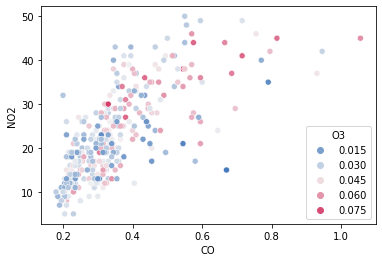

In [90]:
sns.diverging_palette(250, 0, as_cmap = True)

sns.scatterplot(
    data = cinci_2014,
    x = "CO",
    y = "NO2",
    hue = "O3",
    palette = color_palette
)

<AxesSubplot:xlabel='day', ylabel='city'>

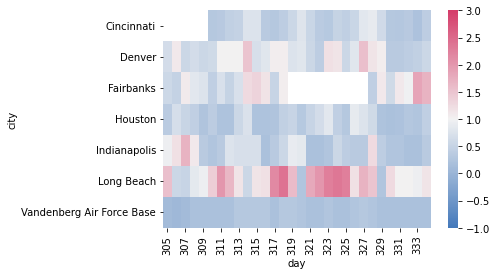

In [85]:
nov_2015 = pollution_data.query("month == 11 & year == 2015")
nov_2015_day_CO = pd.pivot_table(data = nov_2015, index = ["city"], columns = ["day"], values = "CO", aggfunc = np.mean)

color_palette = sns.diverging_palette(250, 0, as_cmap = True)

sns.heatmap(
    data = nov_2015_day_CO,
    cmap = color_palette,
    center = 1,
    vmin = -1,
    vmax = 3
)

## Categorial color palettes

When using color to distinguish between different classes make sure to consider:

* Number of classes: if more than 10, you should compress them and be limited to 10. If you have too many classes but you want to focus on two or three classes in your visualization, you can create 4 classes that include those to be focused on and a fourth one unfiorming the other classes in one color just like we did in the previous notebook.

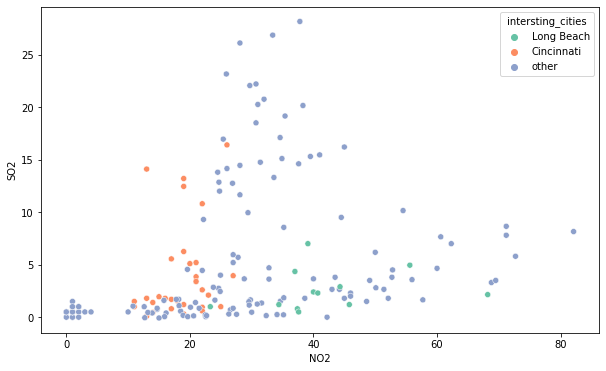

In [102]:
pollution_data_cities = pollution_data.query('year == 2014 & month == 12').copy()

pollution_data_cities["intersting_cities"] = [city if city in ['Long Beach', 'Cincinnati'] else 'other' for city in pollution_data_cities.city]

plt.figure(figsize = (10, 6))

sns.scatterplot(
    data = pollution_data_cities,
    x = "NO2",
    y = "SO2",
    palette = "Set2",
    hue = "intersting_cities",
    hue_order = ['Long Beach', 'Cincinnati', 'other']
);

There a set of defined color palettes that are pleasing to the eye and can be distinguished easily from each other.

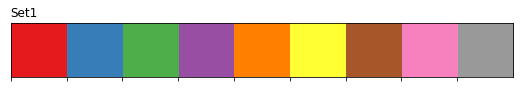

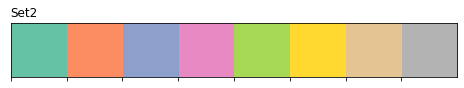

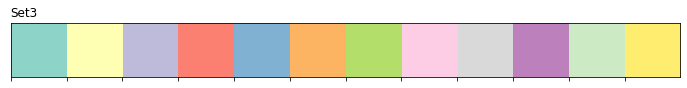

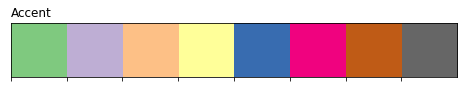

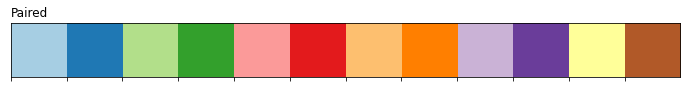

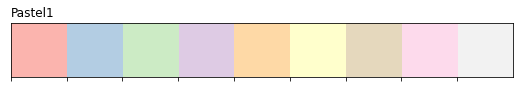

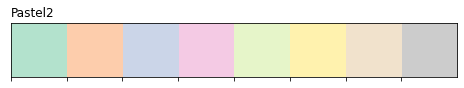

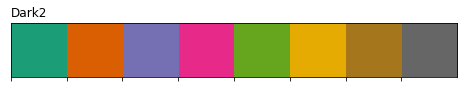

In [104]:
nominal_palettes = ['Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2']

for palette in nominal_palettes:
    sns.palplot(pal = sns.color_palette(palette))
    plt.title(palette, loc = "left")

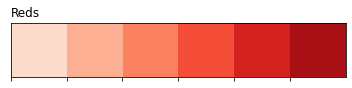

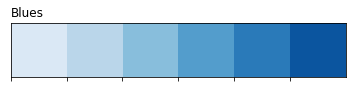

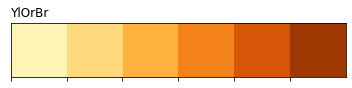

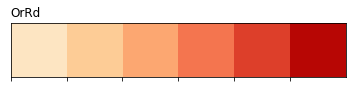

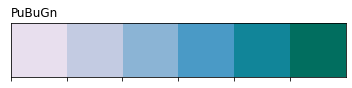

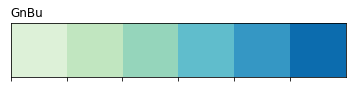

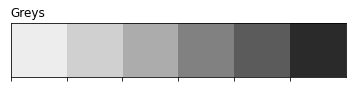

In [114]:
ordinal_palettes = ['Reds', 'Blues', 'YlOrBr', 'OrRd', 'PuBuGn', 'GnBu', 'Greys']

for i, palette in enumerate(ordinal_palettes):
    sns.palplot(sns.color_palette(palette))
    plt.title(palette, loc = 'left')

You can pass the name of the palette, if built-in, in the `palette` argument and `seaborn` will generate the palette internally.

<AxesSubplot:xlabel='CO', ylabel='SO2'>

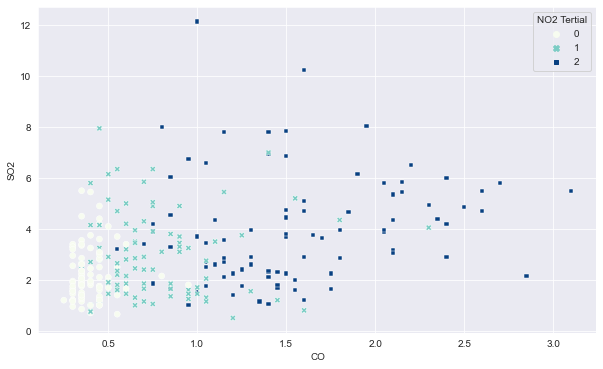

In [117]:
pollution_no2 = pollution_data.query("city == 'Long Beach' & year == 2014").copy()
pollution_no2['NO2 Tertial'] = pd.qcut(pollution_no2.NO2, q = 3, labels = False)

plt.figure(figsize = (10, 6))

sns.set_style("darkgrid")
sns.scatterplot(
    data = pollution_no2,
    x = "CO",
    y = "SO2",
    hue = "NO2 Tertial",
    style = "NO2 Tertial",
    palette = "GnBu"
)